In [53]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline


In [57]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import spacy

In [66]:
punctuations = string.punctuation

nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [68]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [14]:
pd.set_option('display.max_columns', 300)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', 300)  # or 199

In [85]:
new_train_set = pd.read_csv("new_data/train_all.csv")
old_train_set = pd.read_csv("data/train_all.csv")

In [86]:
new_val_set = pd.read_csv("new_data/val_all.csv")
old_val_set = pd.read_csv("data/val_all.csv")

In [96]:
def ngram_solver(train_request_text, train_y, val_request_text, val_y, ngram_size=1): 
    
    bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(ngram_size,ngram_size))
    classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
    pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])
    pipe.fit(train_request_text, train_y)
    predicted = pipe.predict(val_request_text)
    
    
    score = accuracy_score(val_y,predicted)
    return score
    

In [97]:
old_results = []

for x in range(1, 11):
    result = ngram_solver(old_train_set['request_text_edit_aware'], old_train_set['requester_received_pizza'], old_val_set['request_text_edit_aware'], old_val_set['requester_received_pizza'], ngram_size=x)
    old_results.append(result)


In [98]:
new_results = []

for x in range(1, 11):
    result = ngram_solver(new_train_set['request_text'], new_train_set['requester_received_pizza'], new_val_set['request_text'], new_val_set['requester_received_pizza'], ngram_size=x)
    new_results.append(result)



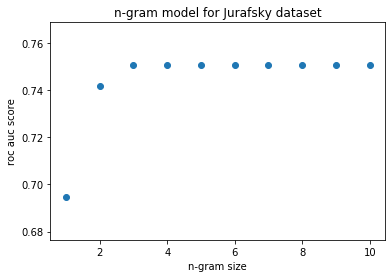

In [99]:
plt.scatter(range(1,11),old_results)
plt.ylabel('roc auc score')
plt.xlabel('n-gram size')
plt.title('n-gram model for Jurafsky dataset')
plt.savefig('ngrams-old.png')

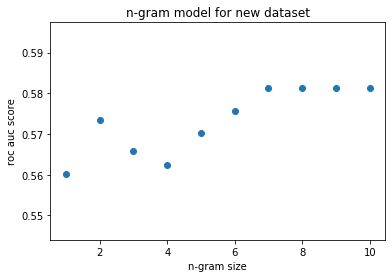

In [100]:
plt.scatter(range(1,11),new_results)
plt.ylabel('roc auc score')
plt.xlabel('n-gram size')
plt.title('n-gram model for new dataset')
plt.savefig('ngrams-new.png')